In [1]:
library(tidyverse)
library(knitr)

#Load datasets
players_url <- "https://raw.githubusercontent.com/Hensonzf/data_science_project_008-35/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Hensonzf/data_science_project_008-35/refs/heads/main/sessions.csv"

players <- read_csv(players_url)
sessions <- read_csv(sessions_url)

# Basic structure examination
glimpse(players)

glimpse(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

**[Initial Data Description]**

In [2]:
# Players dataset summary
print("Players Dataset Summary:")
print(paste("Number of observations:", nrow(players)))
print(paste("Number of variables:", ncol(players)))
print("")


# Variables summary table for players
players_vars <- tibble(
                        Variable = names(players),
                        Type = sapply(players, class),
                        Description = c(
    "Player experience level (Pro, Veteran, Regular, Amateur)",
    "Whether player subscribed to newsletter (TRUE/FALSE)",
    "Hashed email for player identification",
    "Total hours played by the player",
    "Player's display name",
    "Player's gender identity",
    "Player's age in years"
  ),
                        Potential_Issues = c(
    "Categorical with 4 levels, check for consistency",
    "Binary variable, check for missing values",
    "Unique identifier, check for duplicates",
    "Numerical, check for outliers and negative values",
    "Text data, check for duplicates or inappropriate values",
    "Categorical, check for consistent categories",
    "Numerical, check for reasonable age range"
  ))

print("Players Dataset Variables:")
print(players_vars)

# Sessions dataset summary
print("")
print("Sessions Dataset Summary:")
print(paste("Number of observations:", nrow(sessions)))
print(paste("Number of variables:", ncol(sessions)))
print("")

sessions_vars <- tibble(
                        Variable    = names(sessions),
                        Type        = sapply(sessions, class),
                        Description = c(
    "Hashed email linking to players dataset",
    "Session start time as character string",
    "Session end time as character string", 
    "Session start time in numeric format (likely Unix timestamp)",
    "Session end time in numeric format (likely Unix timestamp)"
  ),
                        Potential_Issues = c(
    "Foreign key to players, check for orphaned sessions",
    "Character format needs parsing to datetime",
    "Character format needs parsing to datetime",
    "Verify if this is Unix timestamp and unit (ms/s)",
    "Verify if this is Unix timestamp and unit (ms/s)"
  ))

kable(sessions_vars, caption = "Sessions Dataset Variables")

print("Sessions Dataset Variables:")
print(sessions_vars)

# Data quality checks
print("")
print("Data Quality Checks:")
print("Missing values in players dataset:")
print(colSums(is.na(players)))

print("")
print("Missing values in sessions dataset:")
print(colSums(is.na(sessions)))

print("")
print(paste("Duplicate players (by hashedEmail):", sum(duplicated(players$hashedEmail))))
print(paste("Duplicate sessions:", sum(duplicated(sessions))))


# Check for orphaned sessions (sessions without corresponding players)
orphaned_sessions <- sessions |>
                    filter(!hashedEmail %in% players$hashedEmail)
print(paste("Orphaned sessions (no matching player):", nrow(orphaned_sessions)))


[1] "Players Dataset Summary:"
[1] "Number of observations: 196"
[1] "Number of variables: 7"
[1] ""
[1] "Players Dataset Variables:"
# A tibble: 7 × 4
  Variable     Type      Description                            Potential_Issues
  <chr>        <chr>     <chr>                                  <chr>           
1 experience   character Player experience level (Pro, Veteran… Categorical wit…
2 subscribe    logical   Whether player subscribed to newslett… Binary variable…
3 hashedEmail  character Hashed email for player identification Unique identifi…
4 played_hours numeric   Total hours played by the player       Numerical, chec…
5 name         character Player's display name                  Text data, chec…
6 gender       character Player's gender identity               Categorical, ch…
7 Age          numeric   Player's age in years                  Numerical, chec…
[1] ""
[1] "Sessions Dataset Summary:"
[1] "Number of observations: 1535"
[1] "Number of variables: 5"
[1] ""




Table: Sessions Dataset Variables

|Variable            |Type      |Description                                                  |Potential_Issues                                    |
|:-------------------|:---------|:------------------------------------------------------------|:---------------------------------------------------|
|hashedEmail         |character |Hashed email linking to players dataset                      |Foreign key to players, check for orphaned sessions |
|start_time          |character |Session start time as character string                       |Character format needs parsing to datetime          |
|end_time            |character |Session end time as character string                         |Character format needs parsing to datetime          |
|original_start_time |numeric   |Session start time in numeric format (likely Unix timestamp) |Verify if this is Unix timestamp and unit (ms/s)    |
|original_end_time   |numeric   |Session end time in numeric format (

[1] "Sessions Dataset Variables:"
# A tibble: 5 × 4
  Variable            Type      Description                     Potential_Issues
  <chr>               <chr>     <chr>                           <chr>           
1 hashedEmail         character Hashed email linking to player… Foreign key to …
2 start_time          character Session start time as characte… Character forma…
3 end_time            character Session end time as character … Character forma…
4 original_start_time numeric   Session start time in numeric … Verify if this …
5 original_end_time   numeric   Session end time in numeric fo… Verify if this …
[1] ""
[1] "Data Quality Checks:"
[1] "Missing values in players dataset:"
  experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2 
[1] ""
[1] "Missing values in sessions dataset:"
        hashedEmail          start_time            end_time original_st

In [3]:
#Additional Quality Checks
# 1. Categorical consistency
print("Checking categorical variable consistency:")
print(paste("Unique experience levels:", toString(sort(unique(players$experience)))))
print(paste("Unique gender values:"    , toString(sort(unique(players$gender)))))

# 2. Numerical ranges
print("Numerical variable range checks:")
print(paste("Age range:"         , min(players$Age, na.rm = TRUE)         , "-", max(players$Age, na.rm = TRUE)))
print(paste("Played_hours range:", min(players$played_hours, na.rm = TRUE), "-", max(players$played_hours, na.rm = TRUE)))

# 3. Zero-variance / constants
print("Variable uniqueness checks:")
print(paste("Number of unique names:"        , length(unique(players$name))       , "/", nrow(players)))
print(paste("Number of unique hashed emails:", length(unique(players$hashedEmail)), "/", nrow(players)))

# 4. Subscription distribution
print("Subscription rate summary:")
subscription_summary <- players |>
  count(subscribe) |>
  mutate(percentage = round(n / sum(n) * 100, 1))
print(subscription_summary)

# 5. Experience distribution
print("Experience level distribution:")
experience_summary <- players |>
  count(experience) |>
  mutate(percentage = round(n / sum(n) * 100, 1))
print(experience_summary)

# 6. Players with/without sessions
players_with_sessions <- sessions |>
  distinct(hashedEmail) |>
  nrow()
print(paste("Players with at least one session:", players_with_sessions, "/", nrow(players)))
print(paste("Players with no sessions:"         , nrow(players) - players_with_sessions))

# 7. Session time consistency
print("Session data quality checks:")
sessions_time_check <- sessions |>
  mutate(
    start_dt      = dmy_hm(start_time),
    end_dt        = dmy_hm(end_time),
    duration_mins = as.numeric(difftime(end_dt, start_dt, units = "mins"))
  )
print(paste("Sessions with missing end_time:" , sum(is.na(sessions_time_check$end_dt))))
print(paste("Sessions with negative duration:", sum(sessions_time_check$duration_mins < 0, na.rm = TRUE)))
print(paste("Sessions with 0 duration:"       , sum(sessions_time_check$duration_mins == 0, na.rm = TRUE)))

# 8. Compact dataset summaries
print("=== COMPREHENSIVE DATA SUMMARY ===")
print("Players Dataset:")
print(paste("- Observations:"               , nrow(players)))
print(paste("- Variables:"                  , ncol(players)))
print(paste("- Complete cases (no missing):", sum(complete.cases(players)), "/", nrow(players)))
print(paste("- Missing values total:"       , sum(is.na(players))))

print("Sessions Dataset:")
print(paste("- Observations:", nrow(sessions)))
print(paste("- Variables:", ncol(sessions)))
print(paste("- Unique players with sessions:", length(unique(sessions$hashedEmail))))
print(paste("- Average sessions per player:" , round(nrow(sessions) / max(1, length(unique(sessions$hashedEmail))), 1)))
print(paste("- Missing values total:"        , sum(is.na(sessions))))

# 9. Summary table for report (compute orphaned_sessions right here)
orphaned_sessions <- sessions |>
  filter(!hashedEmail %in% players$hashedEmail)

summary_stats <- tibble(
  Metric = c(
    "Total players", "Total sessions", "Players with sessions",
    "Subscription rate", "Missing Age values", "Missing session end times",
    "Duplicate players (emails)", "Duplicate sessions (rows counted)", "Orphaned sessions"
  ),
  Value = c(
    nrow(players),
    nrow(sessions),
    players_with_sessions,
    paste0(round(mean(players$subscribe, na.rm = TRUE) * 100, 1), "%"),
    sum(is.na(players$Age)),
    sum(is.na(sessions$end_time)),
    sum(duplicated(players$hashedEmail)),
    sum(duplicated(sessions)),
    nrow(orphaned_sessions)
  )
)
print("Summary stats table:")
print(summary_stats)

[1] "Checking categorical variable consistency:"
[1] "Unique experience levels: Amateur, Beginner, Pro, Regular, Veteran"
[1] "Unique gender values: Agender, Female, Male, Non-binary, Other, Prefer not to say, Two-Spirited"
[1] "Numerical variable range checks:"
[1] "Age range: 9 - 58"
[1] "Played_hours range: 0 - 223.1"
[1] "Variable uniqueness checks:"
[1] "Number of unique names: 196 / 196"
[1] "Number of unique hashed emails: 196 / 196"
[1] "Subscription rate summary:"
# A tibble: 2 × 3
  subscribe     n percentage
  <lgl>     <int>      <dbl>
1 FALSE        52       26.5
2 TRUE        144       73.5
[1] "Experience level distribution:"
# A tibble: 5 × 3
  experience     n percentage
  <chr>      <int>      <dbl>
1 Amateur       63       32.1
2 Beginner      35       17.9
3 Pro           14        7.1
4 Regular       36       18.4
5 Veteran       48       24.5
[1] "Players with at least one session: 125 / 196"
[1] "Players with no sessions: 71"
[1] "Session data quality checks:"
[1

**BROAD QUESTION**

"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter,
and how do these features differ between various player types?"

**SPECIFIC QUESTION**

"Can player demographics (Age, gender), experience level, and play time (played_hours) predict newsletter subscription status in the Minecraft player dataset?"

**Summary**:

Predict whether players subscribe using Age, gender, experience, and played_hours by cleaning and encoding predictors, splitting the data stratified on subscribe, fitting interpretable classifiers, and evaluating performance on a held-out test set.

**Variables**
- Response variable: subscribe (binary: TRUE / FALSE)
- Explanatory variables: Age (numeric), gender (categorical), experience (categorical), played_hours (numeric)

**How the data will answer the question**
- The response is directly observed in the dataset via subscribe, enabling supervised classification.
- Explanatory variables provide plausible predictors: Age and gender for demographics, experience for skill level, and played_hours as an engagement proxy.
- With ~196 rows, the dataset can be used with simple predictive models (logistic regression, decision trees) and a held-out test set for evaluation.

**Data wrangling and modelling plan:**

Clean and inspect
- Remove obvious duplicates and fix column name inconsistencies.
- Confirm no missing values in subscribe; report missingness for predictors.

Handle missing predictor values
- Impute the 2 missing Age values with median Age or drop (preferable) those rows if justified; record choice.

Prepare categorical predictors
- Recode experience and gender as factors.
- Group very small gender categories into an “Other” level if counts are too low.

Feature transformation and scaling
- Optionally create Age groupings if data is suspected to not be linear.
- Standardize numeric predictors (Age, played_hours) for models that require it.

Train / test split and sampling
- Split data into 70% training / 30% testing using stratified sampling on subscribe.
- If class imbalance affects performance, consider class weighting or resampling on the training set.

Modeling and evaluation
- Fit interpretable baseline models first (logistic regression, classification tree).
- Use test-set metrics appropriate for binary outcomes (accuracy, ROC AUC, and if rubric expects it, RMSPE is not applicable here).
- Report model coefficients or feature importance and discuss practical significance



**[Exploratory Data Analysis and Visualization]**

[1] "players.csv: 196 observations, 7 variables"
[1] "sessions.csv: 1535 observations, 5 variables"
[1] "Rows removed due to missing Age: 2"
[1] "Rows remaining for EDA: 194"
[1] "Mean values for quantitative variables:"
# A tibble: 2 × 2
  Variable      Mean
  <chr>        <dbl>
1 played_hours   5.9
2 Age           21.1


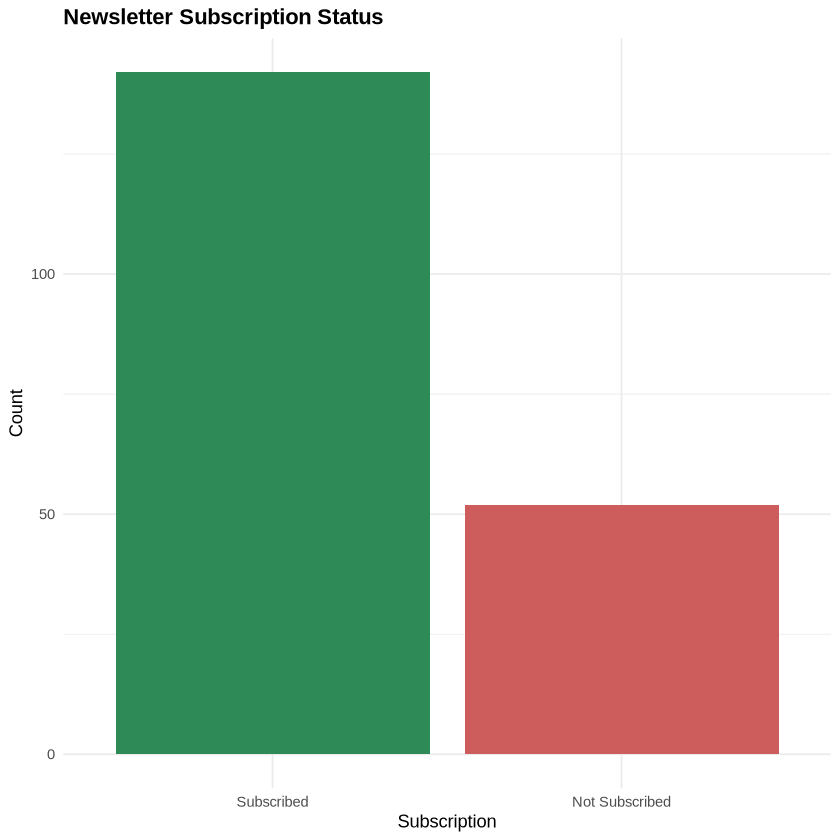

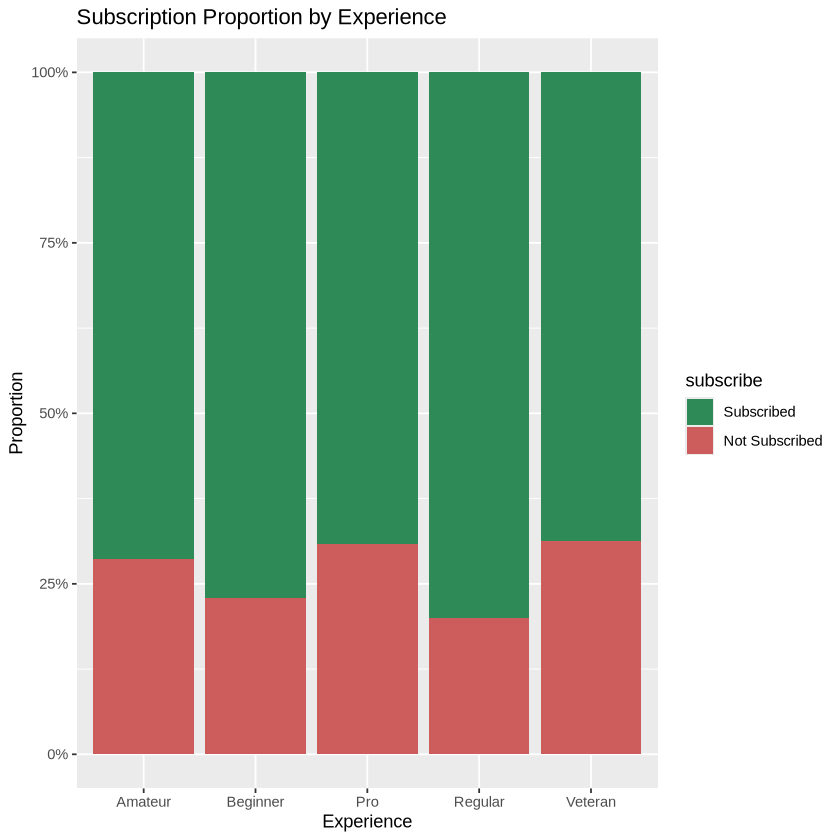

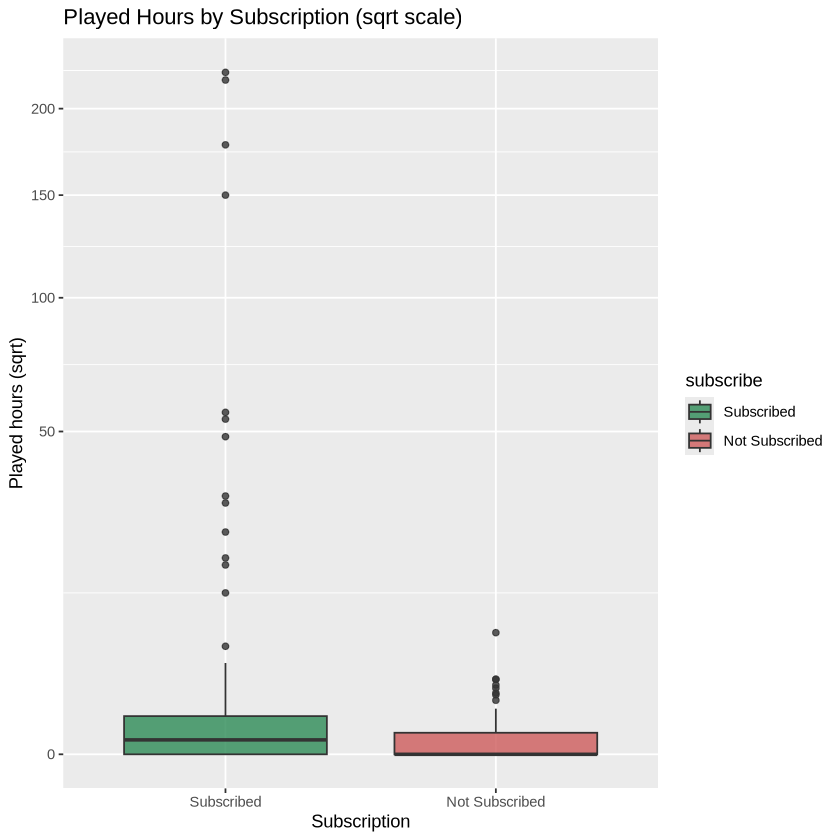

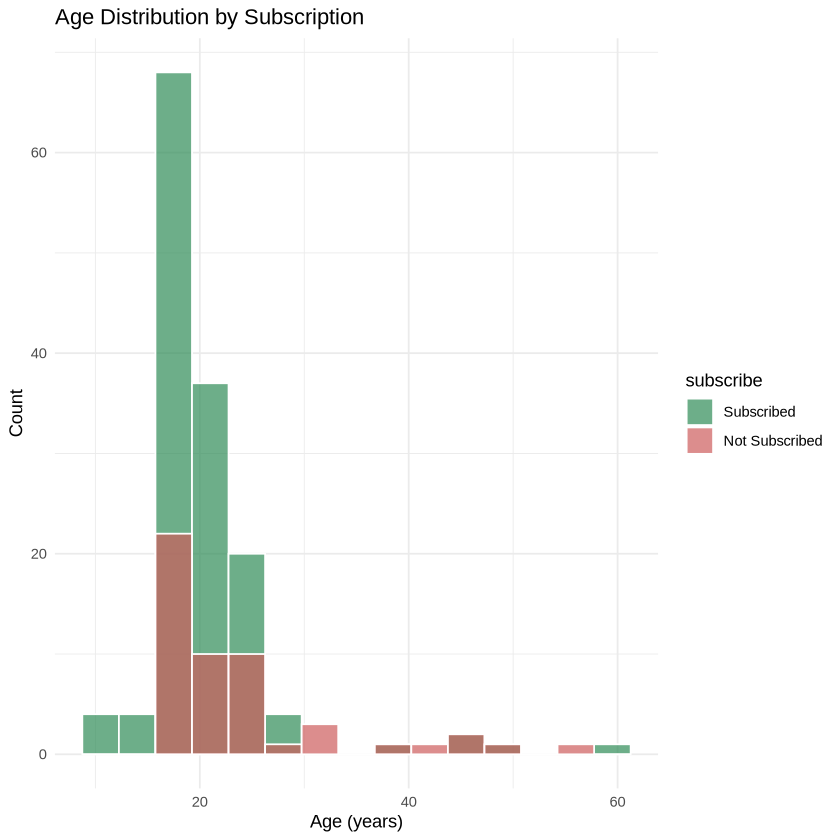

In [4]:
#Minimum Necessary Wrangling

# 1. Demonstrate datasets are loaded
print(paste("players.csv:" , nrow(players) , "observations,", ncol(players) , "variables"))
print(paste("sessions.csv:", nrow(sessions), "observations,", ncol(sessions), "variables"))

# 2. Minimum wrangling
# - remove rows with missing Age because Age is needed for plots and summary here
# - ensure categorical variables are factors (no recoding or grouping)
players_tidy <- players |>
  filter(!is.na(Age)) |>
  mutate(
    experience = factor(experience),
    gender     = factor(gender),
    subscribe  = factor(subscribe, levels = c(TRUE, FALSE), labels = c("Subscribed", "Not Subscribed"))
  )

print(paste("Rows removed due to missing Age:", nrow(players) - nrow(players_tidy)))
print(paste("Rows remaining for EDA:"         , nrow(players_tidy)))

# 3. Mean of each quantitative variable in players.csv (table)
quant_vars <- players_tidy |>
  select(where(is.numeric)) |>
  names()

means_table <- players_tidy |>
  select(all_of(quant_vars)) |>
  summarise(across(everything(), ~ round(mean(., na.rm = TRUE), 2))) |>
  pivot_longer(everything(), names_to = "Variable", values_to = "Mean")

print("Mean values for quantitative variables:")
print(means_table)

# 4. Exploratory visualizations (minimum: response distribution, experience vs subscribe, played_hours by subscribe)
# Plot A: Subscription distribution
plot_sub <- ggplot(players_tidy, aes(x = subscribe, fill = subscribe)) +
  geom_bar(show.legend = FALSE) +
  scale_fill_manual(values = c("Subscribed" = "#2E8B57", "Not Subscribed" = "#CD5C5C")) +
  labs(title               = "Newsletter Subscription Status", x = "Subscription", y = "Count") +
  theme_minimal() + theme(plot.title = element_text(face = "bold"))
print(plot_sub)

# Plot B: Experience level (proportion) by subscription
plot_exp <- players_tidy |>
  count(experience, subscribe) |>
  group_by(experience) |>
  mutate(prop  = n / sum(n)) |>
  ggplot(aes(x = experience, y = prop, fill = subscribe)) +
  geom_col(position         = "stack") +
  scale_y_continuous(labels = function(x) paste0(round(100 * x, 1), "%")) +
  scale_fill_manual(values  = c("Subscribed" = "#2E8B57", "Not Subscribed" = "#CD5C5C")) +
  labs(title                = "Subscription Proportion by Experience", x = "Experience", y = "Proportion")
print(plot_exp)

# Plot C: Played hours (log) by subscription to show central tendency and spread
plot_played_raw <- ggplot(players_tidy, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot(alpha = 0.8) +
  scale_y_continuous(trans = "sqrt") +    # sqrt is gentler and handles zeros
  scale_fill_manual(values = c("Subscribed" = "#2E8B57", "Not Subscribed" = "#CD5C5C")) +
  labs(title               = "Played Hours by Subscription (sqrt scale)", x = "Subscription", y = "Played hours (sqrt)")
print(plot_played_raw)


# Optional: Age distribution by subscription
plot_age <- ggplot(players_tidy, aes(x = Age, fill = subscribe)) +
  geom_histogram(bins = 15, position   = "identity", alpha = 0.7, color = "white") +
  scale_fill_manual(values = c("Subscribed" = "#2E8B57", "Not Subscribed" = "#CD5C5C")) +
  labs(title               = "Age Distribution by Subscription", x = "Age (years)", y = "Count") +
  theme_minimal()
print(plot_age)

**Insights/Notes:**

Datasets loaded
- players.csv:  196 observations,  7 variables
- sessions.csv: 1535 observations, 5 variables
- Both successfully loaded

Minimum wrangling performed
- Removed rows with missing Age only: 2 rows removed
- Rows used for EDA: 194

Mean values for quantitative variables
played_hours: 5.9
Age:          21.1 


**Plots created**
- Subscription status (bar chart)

-> shows distribution (count) of #subscribers to nonsubscribers (the response variable).
- Subscription proportion by experience (stacked proportion bars)

-> compares subscription rates across experience levels.
- Played hours by subscription (boxplot on transformed scale; log10(played_hours + 1) or sqrt)

-> shows medians, spread, and extreme outliers; transform used because played_hours is (insanely) right‑skewed and contains zeros.
- Age distribution by subscription (histogram)

-> shows overlap in age distributions between groups.

**Insights**
- Subscription rate ≈ 73.2% (class imbalance; note for later modeling).
- Experience appears correlated with subscription: higher experience tends to have higher subscription rates.
- played_hours is right‑skewed with extreme outliers; subscribers have a higher median played_hours. I transformed played_hours for the boxplot to show central tendency clearly.

- Age distributions for subscribed vs not subscribed largely overlap; any age effect appears modest.
- No additional wrangling was done here; further cleaning/feature work will be performed during the modeling phase.

**Captions that would be helpful**
- Subscription bar chart: “Distribution of newsletter subscription (n = 194 used for EDA); shows ~73% subscribed — consider class imbalance.”
- Experience proportion plot: “Subscription proportion by experience level; higher experience → higher subscription.”
- Played hours boxplot: “Played hours by subscription (transformed): log10(played_hours + 1) used to handle zeros and right skew; shows higher median for subscribed players and extreme right tail.”
- Age histogram: “Age distribution by subscription; similar shapes and overlapping ranges.”


**[Methods and Plan]**

Proposed Method: Use logistic regression with regularization (LASSO/Ridge) to predict newsletter subscription and identify important features. 

Why this method is appropriate:
- Response variable is binary (subscribe: TRUE/FALSE)
- Provides interpretable coefficients to understand feature importance
- Regularization helps handle potential multicollinearity
- Works well with mixed data types (categorical and numerical)
- Suitable for moderate dataset size (196 observations)

Assumptions required:
- Linear relationship between log-odds and continuous predictors
- Independent observations (each player is independent)
- No perfect multicollinearity among predictors
- Adequate sample size for the number of predictors

Potential limitations:
- May not capture complex nonlinear relationships
- Requires careful encoding of categorical variables
- Sensitive to outliers in predictor variables
- Assumes linearity in log-odds which may not hold

Model comparison and selection approach:
- Use cross-validation to tune regularization parameters
- Compare models using AUC-ROC and accuracy metrics
- Consider feature importance and model interpretability
- Potentially compare with Random Forest for benchmarking

Data processing plan:
- Data split: 70% training, 15% validation, 15% test
- Preprocessing steps:
  * Handle missing values (if any)
  * Encode categorical variables (experience, gender)
  * Scale numerical variables (Age, played_hours)
  * Feature engineering from sessions data
- Split data before any feature engineering to avoid data leakage
- Use stratified sampling to maintain subscription proportion in splits

**[GitHub Repository]**

**Repository Link:** https://github.com/Hensonzf/data_science_project_008-35.git